# Convolutional Neural Network Notes

Connie Liang

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import timeit

%matplotlib inline
plt.style.use('ggplot')

import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras
AUTOTUNE = tf.data.experimental.AUTOTUNE #optimizes image processing

- Convolutional Neural Networks are specially designed to perform image classification. However, they can also be used for audio reocgnition, sentiment analysis in text, and text generation
- In terms of image classification, the goal of the algorithm is to learn the label of an image based on its contents
-

# Images Can Be Represented as Tensors

- Tensors are just multidimensional arrays
    - a one dimensional tensor is a vector
    - a two dimensonal tensor is a matrix
    - a tensor of a larger dimension is called a 3, 4 tensor, etc
    

- To get an element from a 3 tensor, you need to give it three indices:
    `three_tensor[i,j,k]`


# Examining the mnist Dataset

features 70k images in 10 digits. 28x28 pixels, normalized, and centered

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [5]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

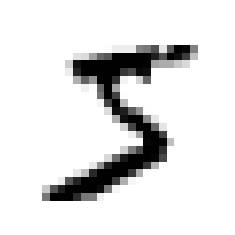

In [9]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary) #cmap converts to black and white
plt.xticks([])
plt.yticks([])
plt.show()

Each of the greyscale images in the digits dataset can be represented as a matrix. Each number within the matrix represents the pixel intensity, from 0 (white) to 255 (black). If we take a slice of the first image in our dataset, we can see the intensity of the pixels:

In [11]:
train_images[0][:10,:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156]], dtype=uint8)

Before we load the images into a CNN model, though, we have to normalize them by rescaling the intensity to between 0 and 1.

In [12]:
train_images = train_images / 255
test_images = test_images / 255

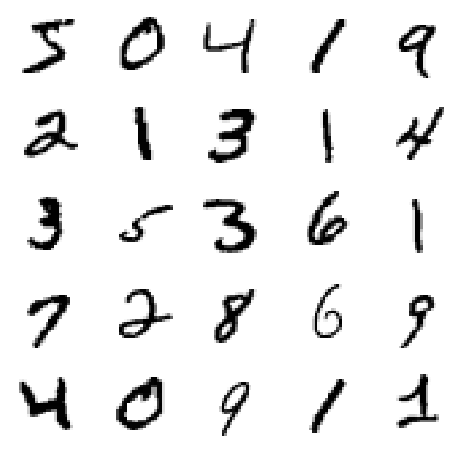

In [20]:
# show the first 25 images

plt.figure(figsize=(8,8))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

# Applying CNN to the Oxford Flowers Dataset

In [21]:
flowers_path = '/home/connie/Downloads/oxford_flowers/jpg'

Test out our file path by loading in one image:

In [23]:
file_path = flowers_path + '/image_00001.jpg'
raw_image = tf.io.read_file(file_path) # reads in a single file
image = tf.image.decode_jpeg(raw_image, channels=3) # converts raw image to tensor

In [24]:
image.shape

TensorShape([500, 591, 3])

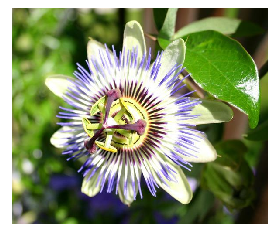

In [26]:
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()